In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset_train_v1 = pd.read_excel('Data_Train.xlsx')
dataset_train_v1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
dataset_train_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
dataset_train_v1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

there is one null record in both Route and Total_Stops variables each

In [6]:
dataset_train_v1[dataset_train_v1['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


The null values of both the variables belongs to the same record

In [7]:
# since there are only one record in the dataset with null value, we can drop it

dataset_train_v1.dropna(inplace=True)
dataset_train_v1.shape

(10682, 11)

In [8]:
dataset_train_v1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [48]:
dataset_test_v1 = pd.read_excel('Test_set.xlsx')
dataset_test_v1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [50]:
dataset_test_v1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

The test dataset doesn't have any null data, hence, we can append with the test for data cleaning and transforming 

In [51]:
dataset_train_v1 = dataset_train_v1.append(dataset_test_v1,sort=False)

In [52]:
# Converting the Date format into Year, Month and Date Values

dataset_train_v1['Year'] = pd.DatetimeIndex(dataset_train_v1['Date_of_Journey']).year
dataset_train_v1['Month'] = pd.DatetimeIndex(dataset_train_v1['Date_of_Journey']).month
dataset_train_v1['Day'] = pd.DatetimeIndex(dataset_train_v1['Date_of_Journey']).day

In [53]:
import calendar
dataset_train_v1['Month Name'] = dataset_train_v1['Month'].apply(lambda x: calendar.month_name[x])

In [54]:
dataset_train_v1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Day,Month Name,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897.0,2019,3,24,March,1.0,10.0,22.0,20.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,2019,1,5,January,13.0,15.0,5.0,50.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882.0,2019,9,6,September,4.0,25.0,9.0,25.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,2019,12,5,December,23.0,30.0,18.0,5.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,2019,1,3,January,21.0,35.0,16.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,2019,6,6,June,NaN,NaN,NaN,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,2019,3,27,March,NaN,NaN,NaN,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,2019,6,3,June,NaN,NaN,NaN,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,2019,6,3,June,NaN,NaN,NaN,NaN


In [55]:
dataset_train_v1['Year'].value_counts()

2019    13353
Name: Year, dtype: int64

Text(0, 0.5, 'No. of flights')

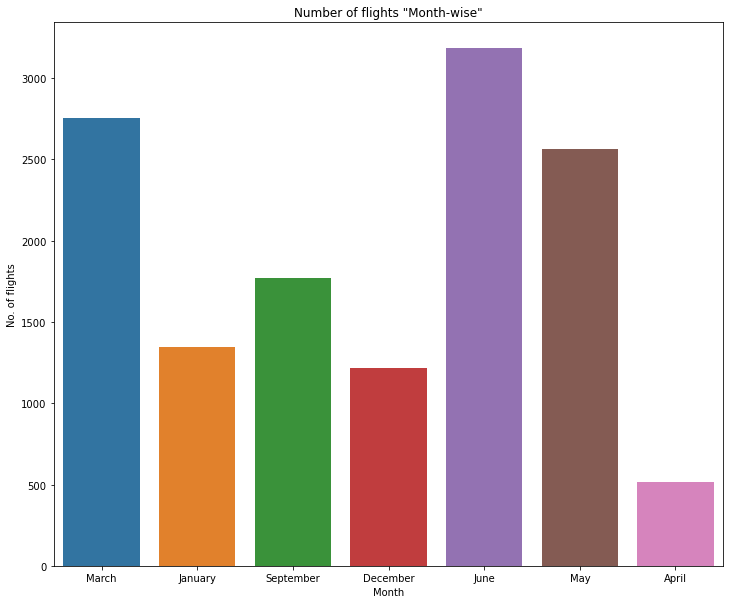

In [56]:
# Calculating the number of flights on M-o-M
plt.figure(figsize = (12 , 10))
sns.countplot(x = 'Month Name', data = dataset_train_v1)
plt.title('Number of flights "Month-wise"')
plt.xlabel('Month')
plt.ylabel('No. of flights')

<function matplotlib.pyplot.show(close=None, block=None)>

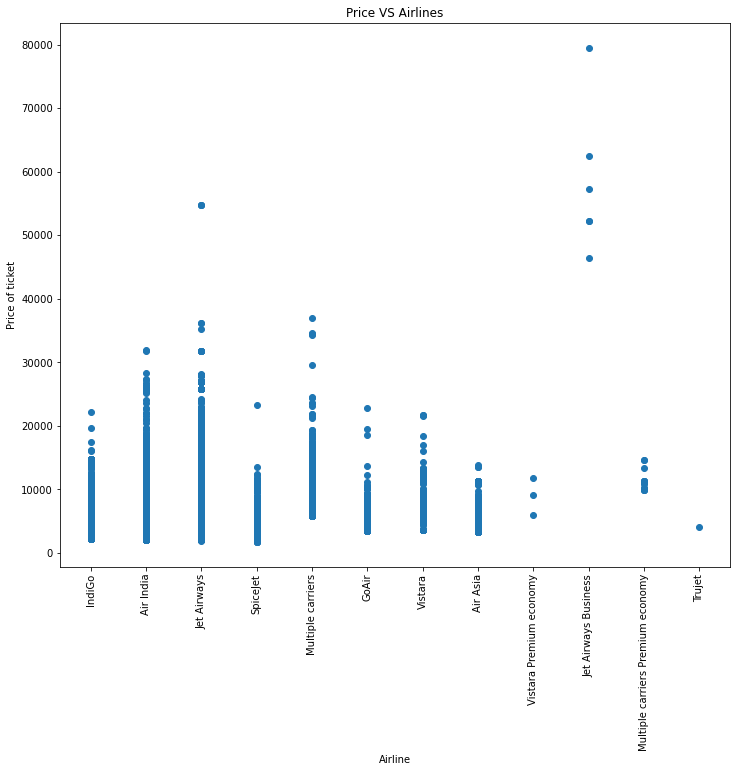

In [57]:
# Understanding the price variation for each of the available airlines

plt.figure(figsize = (12, 10))
plt.scatter(dataset_train_v1['Airline'], dataset_train_v1['Price'])
plt.title('Price VS Airlines')
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)
plt.show

From the above scatterplot, Jet Airways has highest pricing for their flights

<function matplotlib.pyplot.show(close=None, block=None)>

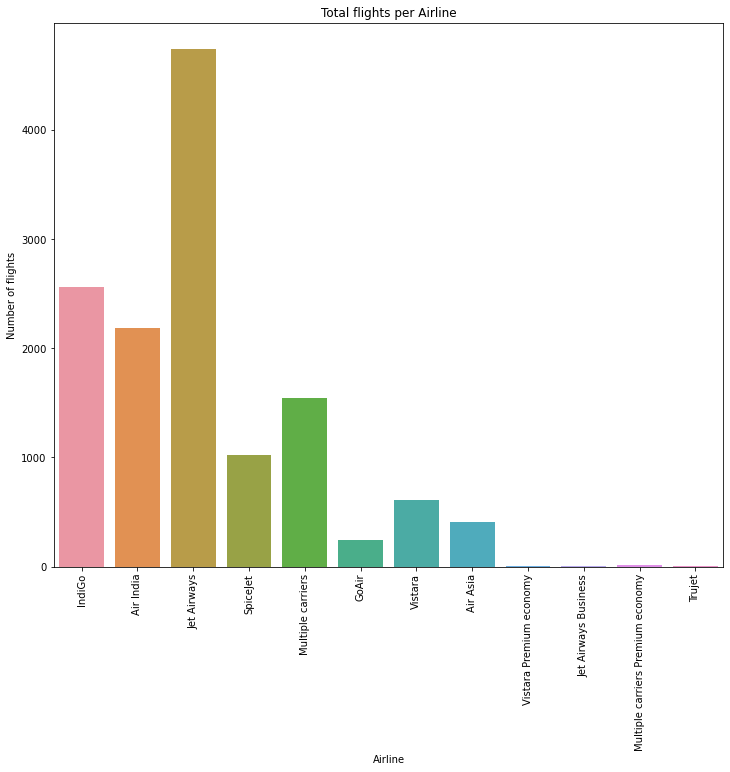

In [59]:
# Understanding the number of flight of various airlines

plt.figure(figsize = (12, 10))
sns.countplot(x = 'Airline', data = dataset_train_v1)
plt.title('Total flights per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of flights')
plt.xticks(rotation = 90)
plt.show

Jet Airways had maximum number of flight during the given period followed by IndiGo

In [60]:
dataset_train_v1["Total_Stops"].value_counts()

1           5625
0           3491
2           1520
1 stop      1431
non-stop     849
2 stops      379
3             45
3 stops       11
4              1
4 stops        1
Name: Total_Stops, dtype: int64

In [61]:
# COnverting the datatype of "Total Stops" variable into integer type for better understanding
dataset_train_v1.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [62]:
hm = dataset_train_v1.drop(['Year'], axis = 1)

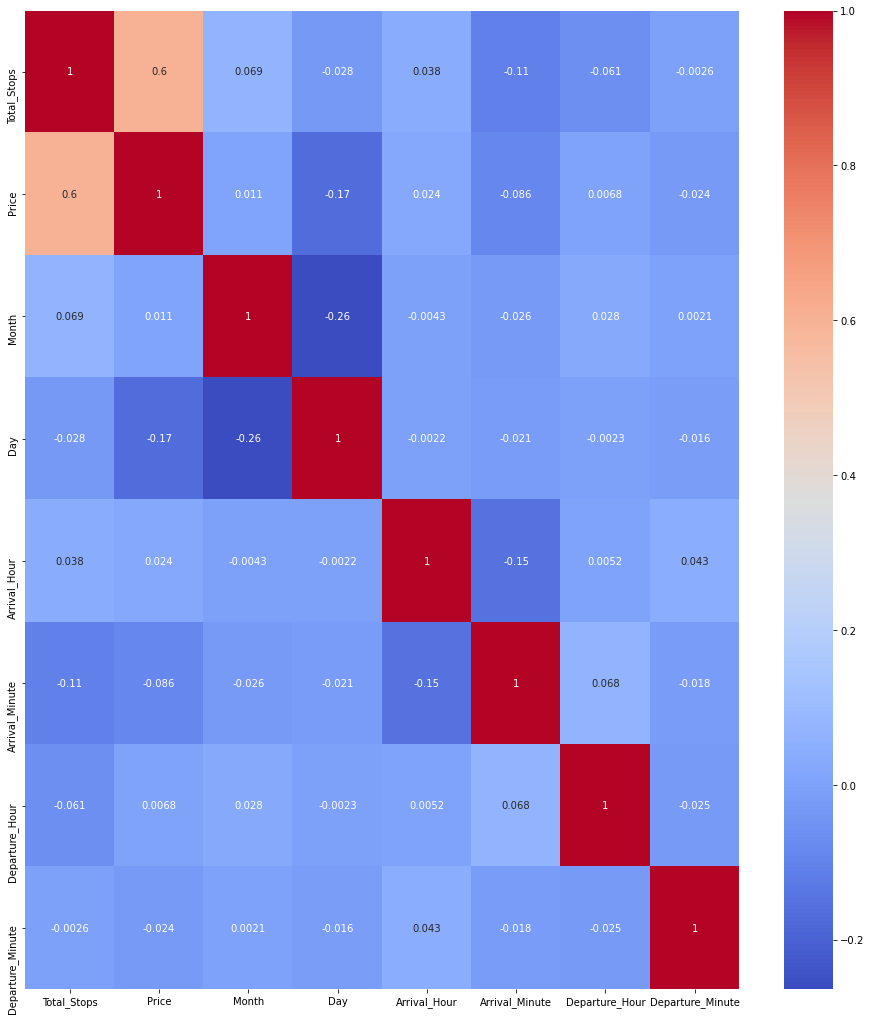

In [63]:
# Understanding the correlation between Independent and dependent attributes
plt.figure(figsize = (16,18))
sns.heatmap(hm.corr(), annot = True, cmap = "coolwarm")

plt.show()

from the above heatmap, there is strong correlation between "Total Stops" and "Price"

In [64]:
# Converting the arrival time into hour / minutes format

dataset_train_v1['Arrival_Time']= dataset_train_v1['Arrival_Time'].str.split(' ').str[0]
dataset_train_v1['Arrival_Hour'] = dataset_train_v1['Arrival_Time'] .str.split(':').str[0].astype(int)
dataset_train_v1['Arrival_Minute'] = dataset_train_v1['Arrival_Time'] .str.split(':').str[1].astype(int)

In [65]:
# Similarly, Converting the arrival time into hour / minutes format

dataset_train_v1['Departure_Hour'] = dataset_train_v1['Dep_Time'] .str.split(':').str[0].astype(int)
dataset_train_v1['Departure_Minute'] = dataset_train_v1['Dep_Time'] .str.split(':').str[1].astype(int)

In [81]:
dataset_train_v2 = dataset_train_v1.drop(['Dep_Time', 'Arrival_Time', 'Date_of_Journey', 'Duration'], axis = 1)
dataset_train_v2

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Year,Month,Day,Month Name,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897.0,2019,3,24,March,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662.0,2019,1,5,January,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882.0,2019,9,6,September,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218.0,2019,12,5,December,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302.0,2019,1,3,January,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1,No info,NaN,2019,6,6,June,20,25,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,0,No info,NaN,2019,3,27,March,16,55,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,No info,NaN,2019,6,3,June,4,25,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1,No info,NaN,2019,6,3,June,19,15,4,0


In [82]:
dataset_train_v2['Additional_Info'].value_counts()

No info                         10492
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
Red-eye flight                      1
1 Short layover                     1
2 Long layover                      1
Name: Additional_Info, dtype: int64

for approx. 80 % of the flights, we do not have any info. Hence, we can drop this variable

In [83]:
dataset_train_v2 = dataset_train_v2.drop(['Additional_Info'], axis = 1)
dataset_train_v2

,Airline,Source,Destination,Route,Total_Stops,Price,Year,Month,Day,Month Name,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897.0,2019,3,24,March,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662.0,2019,1,5,January,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882.0,2019,9,6,September,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218.0,2019,12,5,December,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302.0,2019,1,3,January,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1,NaN,2019,6,6,June,20,25,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,0,NaN,2019,3,27,March,16,55,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,NaN,2019,6,3,June,4,25,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1,NaN,2019,6,3,June,19,15,4,0


In [84]:
dataset_train_v2 = dataset_train_v2.drop(['Month Name'], axis = 1)
dataset_train_v2

,Airline,Source,Destination,Route,Total_Stops,Price,Year,Month,Day,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897.0,2019,3,24,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662.0,2019,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882.0,2019,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218.0,2019,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302.0,2019,1,3,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1,NaN,2019,6,6,20,25,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,0,NaN,2019,3,27,16,55,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,NaN,2019,6,3,4,25,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1,NaN,2019,6,3,19,15,4,0


In [85]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

dataset_train_v2["Airline"] = encoder.fit_transform(dataset_train_v2['Airline'])
dataset_train_v2["Source"] = encoder.fit_transform(dataset_train_v2['Source'])
dataset_train_v2["Destination"] = encoder.fit_transform(dataset_train_v2['Destination'])
dataset_train_v2["Route"] = encoder.fit_transform(dataset_train_v2['Route'])

In [86]:
dataset_train_v2.head()


,Airline,Source,Destination,Route,Total_Stops,Price,Year,Month,Day,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,3,0,5,18,0,3897.0,2019,3,24,1,10,22,20
1,1,3,0,87,2,7662.0,2019,1,5,13,15,5,50
2,4,2,1,122,2,13882.0,2019,9,6,4,25,9,25
3,3,3,0,95,1,6218.0,2019,12,5,23,30,18,5
4,3,0,5,29,1,13302.0,2019,1,3,21,35,16,50


In [92]:
dataset_test_v2.isnull().sum()

Airline                0
Source                 0
Destination            0
Route                  0
Total_Stops            0
Price               2670
Year                   0
Month                  0
Day                    0
Arrival_Hour           0
Arrival_Minute         0
Departure_Hour         0
Departure_Minute       0
dtype: int64

In [99]:
dataset_train_v3 = dataset_train_v2[0:10682]
dataset_test_v2 = dataset_train_v2[10682:]

In [100]:
## Preparing the features and target variable

X = dataset_train_v3.drop(['Price'], axis = 1)
y = dataset_train_v3['Price']

In [104]:
# Splitting the dataset into training and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=0)

In [105]:
# Using Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
predict_lr = lr.predict(X_test)

In [109]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=20)

print('MAE : ', metrics.mean_absolute_error(y_test, predict_lr))
print('MSE : ', metrics.mean_squared_error(y_test, predict_lr))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, predict_lr)))
print('R2 Score : ', metrics.r2_score(y_test, predict_lr))

Accuracy_data = cross_val_score(lr, X_train, y_train, cv = kfold)
print("Accuracy: {:.2f} %".format(Accuracy_data.mean()*100))

MAE :  2579.735266967388
MSE :  13742247.071708476
RMSE :  3707.053691506029
R2 Score :  0.41430573269865056
Accuracy: 43.12 %


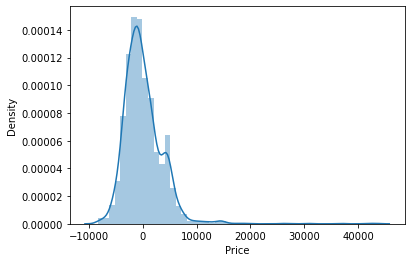

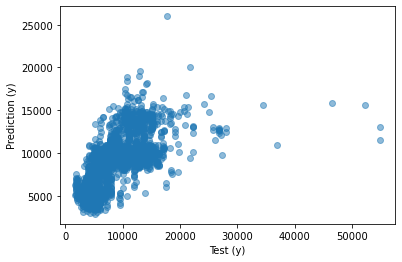

In [113]:
# Plotting the output graph for Linear Regression Model

sns.distplot(y_test-predict_lr)
plt.show()

plt.scatter(y_test, predict_lr, alpha = 0.5)
plt.xlabel("Test (y)")
plt.ylabel("Prediction (y)")
plt.show()

In [110]:
# Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

random_fr = RandomForestRegressor(n_estimators = 400, min_samples_split = 15, min_samples_leaf = 2, max_features = 'auto', max_depth = 30)
random_fr.fit(X_train, y_train)
pred_rfr = random_fr.predict(X_test)

In [111]:
print('MAE : ', metrics.mean_absolute_error(y_test, pred_rfr))
print('MSE : ', metrics.mean_squared_error(y_test, pred_rfr))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, pred_rfr)))
print('R2 Score : ', metrics.r2_score(y_test, pred_rfr))

Accuracy_data = cross_val_score(random_fr, X_train, y_train, cv = kfold)
print("Accuracy: {:.2f} %".format(Accuracy_data.mean()*100))

MAE :  1193.0986852437393
MSE :  4946344.887564288
RMSE :  2224.037969002393
R2 Score :  0.7891868899151169
Accuracy: 82.76 %


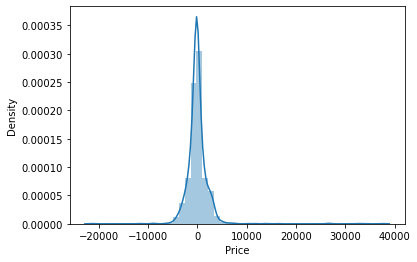

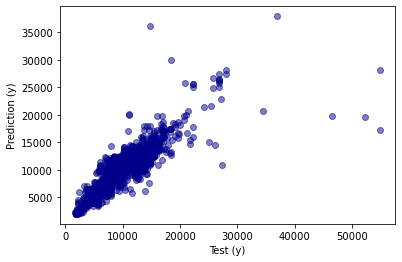

In [120]:
# Plotting the output graph for Random Forest Regression Model

sns.distplot(y_test-pred_rfr)
plt.show()

plt.scatter(y_test, pred_rfr, alpha = 0.5, color = "DarkBlue")
plt.xlabel("Test (y)")
plt.ylabel("Prediction (y)")
plt.show()

In [115]:
#Using Decision Tree Model

from sklearn.tree import DecisionTreeRegressor

decision_tr = DecisionTreeRegressor(random_state = 0)
decision_tr.fit(X_train, y_train)
pred_dtr = decision_tr.predict(X_test)

In [116]:
print('MAE : ', metrics.mean_absolute_error(y_test, pred_dtr))
print('MSE : ', metrics.mean_squared_error(y_test, pred_dtr))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, pred_dtr)))
print('R2 Score : ', metrics.r2_score(y_test, pred_dtr))

Accuracy_data = cross_val_score(decision_tr, X_train, y_train, cv = kfold)
print("Accuracy: {:.2f} %".format(Accuracy_data.mean()*100))

MAE :  1476.9322414599908
MSE :  9405778.577234698
RMSE :  3066.8841806032874
R2 Score :  0.5991259243523903
Accuracy: 70.58 %


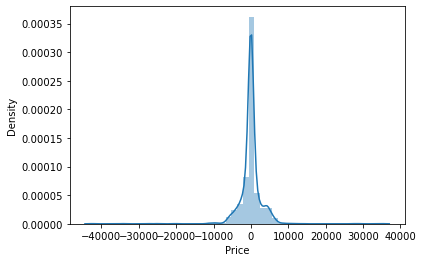

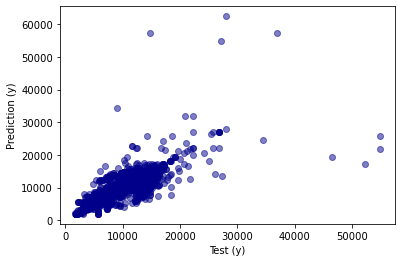

In [119]:
# Plotting the output graph for Decision Tree Regression Model

sns.distplot(y_test-pred_dtr)
plt.show()

plt.scatter(y_test, pred_dtr, alpha = 0.5, color = "DarkBlue")
plt.xlabel("Test (y)")
plt.ylabel("Prediction (y)")
plt.show()

From the above Models,
- Random Forest has the highest accuracy of 82.76 %
- It also has the highest R2 Score of 0.7891
- Hence, Random Forest model will be well suited for predicting the price